# Import libraries

In [47]:
%%capture
import tensorflow as tf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

from keras.utils import to_categorical
from keras.datasets import mnist
from keras import models, layers

# Load the Data


In [48]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()
print(X_train.shape)
print(X_test.shape)

(60000, 28, 28)
(10000, 28, 28)


# Take a look into Data

In [49]:
print(X_train.ndim)
print(X_train.shape)

3
(60000, 28, 28)


<Figure size 432x288 with 0 Axes>

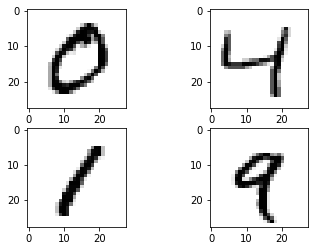

0
4
1
9


In [50]:
plt.figure()

#subplot(r,c) provide the no. of rows and columns
f, axarr = plt.subplots(2,2) 

# use the created array to output your multiple images.
axarr[0][0].imshow(X_train[1,:,:], cmap = plt.cm.binary)
axarr[0][1].imshow(X_train[2,:,:], cmap = plt.cm.binary)
axarr[1][0].imshow(X_train[3,:,:], cmap = plt.cm.binary)
axarr[1][1].imshow(X_train[4,:,:], cmap = plt.cm.binary)

# Combine all the operations and display
plt.show()

# Correct answers
for i in range(1,5):
    print(y_train[i])

# Reshape and Normalise
In order to make sure that Keras could use our images, we need to reshape them into 1 dimension

In [51]:
X_train = X_train.reshape((60000, 28*28))
X_train = X_train.astype("float32")/255
X_train.shape

(60000, 784)

In [52]:
X_test = X_test.reshape((10000, 28*28))
X_test = X_test.astype("float32")/255
X_test.shape

(10000, 784)

# Encode the labels

In [53]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Create and train a model

In [54]:
model = models.Sequential()
model.add(layers.Dense(512, activation = 'relu', input_shape = (28*28, )))
model.add(layers.Dense(10, activation = 'softmax'))

In [55]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 512)               401920    
                                                                 
 dense_7 (Dense)             (None, 10)                5130      
                                                                 
Total params: 407,050
Trainable params: 407,050
Non-trainable params: 0
_________________________________________________________________


In [56]:
model.compile(optimizer="rmsprop", loss = "categorical_crossentropy", metrics = ["accuracy"])

In [58]:
model.fit(X_train, y_train, epochs=10, batch_size=256)

Epoch 1/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0243 - accuracy: 0.9931
Epoch 2/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0186 - accuracy: 0.9953
Epoch 3/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0148 - accuracy: 0.9961
Epoch 4/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0112 - accuracy: 0.9969
Epoch 5/10
235/235 [==============================] - 3s 13ms/step - loss: 0.0085 - accuracy: 0.9979
Epoch 6/10
235/235 [==============================] - 3s 14ms/step - loss: 0.0067 - accuracy: 0.9984
Epoch 7/10
235/235 [==============================] - 5s 21ms/step - loss: 0.0052 - accuracy: 0.9989
Epoch 8/10
235/235 [==============================] - 4s 16ms/step - loss: 0.0040 - accuracy: 0.9991
Epoch 9/10
235/235 [==============================] - 5s 22ms/step - loss: 0.0031 - accuracy: 0.9994
Epoch 10/10
235/235 [==============================] - 6s 26ms/step - loss: 0.0025 - accura

# Test the model

In [59]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print(test_loss)
print(test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0763 - accuracy: 0.9814
0.07626640796661377
0.9814000129699707
